# HW1

In [1]:
#imports
import pandas as pd

In [2]:
#read data 
df = pd.read_csv('penguins.csv', header=None, names=['island', 'bill_length_mm', 'bill_depth_mm','flipper','body_mass_g','sex','species'])


## Q1



In [3]:
nan_values=df.isna()
# check for count
nan_values.sum()

island             0
bill_length_mm     2
bill_depth_mm      2
flipper            2
body_mass_g        2
sex               11
species            0
dtype: int64

## Q2
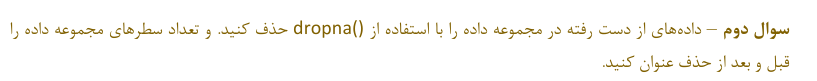

In [4]:
# rows before delete
row_count_before=df.shape[0]
print(row_count_before)
# drop nan values
df_without_nan=df.dropna()
row_count_after=df_without_nan.shape[0]
print(row_count_after)

344
333


## Q3



In [5]:
# replace non-bolean values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
replaced_df_nboolean=df.copy(deep=True)
nboolean_columns=['bill_length_mm', 'bill_depth_mm','flipper','body_mass_g']
imputer.fit(replaced_df_nboolean[nboolean_columns])
replaced_df_nboolean[nboolean_columns] = pd.DataFrame(imputer.transform(replaced_df_nboolean[nboolean_columns]))
replaced_df_nboolean


island  bill_length_mm  bill_depth_mm     flipper  body_mass_g  \
0    Torgersen        39.10000       18.70000  181.000000  3750.000000   
1    Torgersen        39.50000       17.40000  186.000000  3800.000000   
2    Torgersen        40.30000       18.00000  195.000000  3250.000000   
3    Torgersen        43.92193       17.15117  200.915205  4201.754386   
4    Torgersen        36.70000       19.30000  193.000000  3450.000000   
..         ...             ...            ...         ...          ...   
339      Dream        55.80000       19.80000  207.000000  4000.000000   
340      Dream        43.50000       18.10000  202.000000  3400.000000   
341      Dream        49.60000       18.20000  193.000000  3775.000000   
342      Dream        50.80000       19.00000  210.000000  4100.000000   
343      Dream        50.20000       18.70000  198.000000  3775.000000   

        sex    species  
0      male     Adelie  
1    female     Adelie  
2    female     Adelie  
3       NaN     Adelie  
4    female     Adelie  
..      ...        ...  
339    male  Chinstrap  
340  female  Chinstrap  
341    male  Chinstrap  
342    male  Chinstrap  
343  female  Chinstrap  

[344 rows x 7 columns]

In [6]:
# now for boolean values
boolean_cols= ['sex','species','island']
imputer = SimpleImputer(strategy='most_frequent')
replaced_df_nboolean[boolean_cols]=imputer.fit_transform(replaced_df_nboolean[boolean_cols])
replaced_df=replaced_df_nboolean
df=replaced_df
replaced_df

island  bill_length_mm  bill_depth_mm     flipper  body_mass_g  \
0    Torgersen        39.10000       18.70000  181.000000  3750.000000   
1    Torgersen        39.50000       17.40000  186.000000  3800.000000   
2    Torgersen        40.30000       18.00000  195.000000  3250.000000   
3    Torgersen        43.92193       17.15117  200.915205  4201.754386   
4    Torgersen        36.70000       19.30000  193.000000  3450.000000   
..         ...             ...            ...         ...          ...   
339      Dream        55.80000       19.80000  207.000000  4000.000000   
340      Dream        43.50000       18.10000  202.000000  3400.000000   
341      Dream        49.60000       18.20000  193.000000  3775.000000   
342      Dream        50.80000       19.00000  210.000000  4100.000000   
343      Dream        50.20000       18.70000  198.000000  3775.000000   

        sex    species  
0      male     Adelie  
1    female     Adelie  
2    female     Adelie  
3      male     Adelie  
4    female     Adelie  
..      ...        ...  
339    male  Chinstrap  
340  female  Chinstrap  
341    male  Chinstrap  
342    male  Chinstrap  
343  female  Chinstrap  

[344 rows x 7 columns]

## Q4
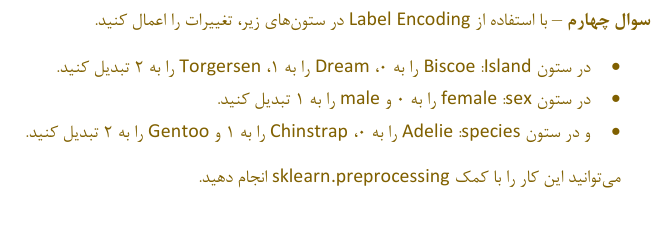

In [7]:
#import then convert
from sklearn.preprocessing import LabelEncoder
new_df=df.copy(deep=True)
le = LabelEncoder()
new_df['island']=le.fit_transform(new_df['island'])
new_df['sex']=le.fit_transform(new_df['sex'])
new_df['species']=le.fit_transform(new_df['species'])
df=new_df
new_df

island  bill_length_mm  bill_depth_mm     flipper  body_mass_g  sex  \
0         2        39.10000       18.70000  181.000000  3750.000000    1   
1         2        39.50000       17.40000  186.000000  3800.000000    0   
2         2        40.30000       18.00000  195.000000  3250.000000    0   
3         2        43.92193       17.15117  200.915205  4201.754386    1   
4         2        36.70000       19.30000  193.000000  3450.000000    0   
..      ...             ...            ...         ...          ...  ...   
339       1        55.80000       19.80000  207.000000  4000.000000    1   
340       1        43.50000       18.10000  202.000000  3400.000000    0   
341       1        49.60000       18.20000  193.000000  3775.000000    1   
342       1        50.80000       19.00000  210.000000  4100.000000    1   
343       1        50.20000       18.70000  198.000000  3775.000000    0   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
339        1  
340        1  
341        1  
342        1  
343        1  

[344 rows x 7 columns]

## Q5 


## answer


## Q6


## answer

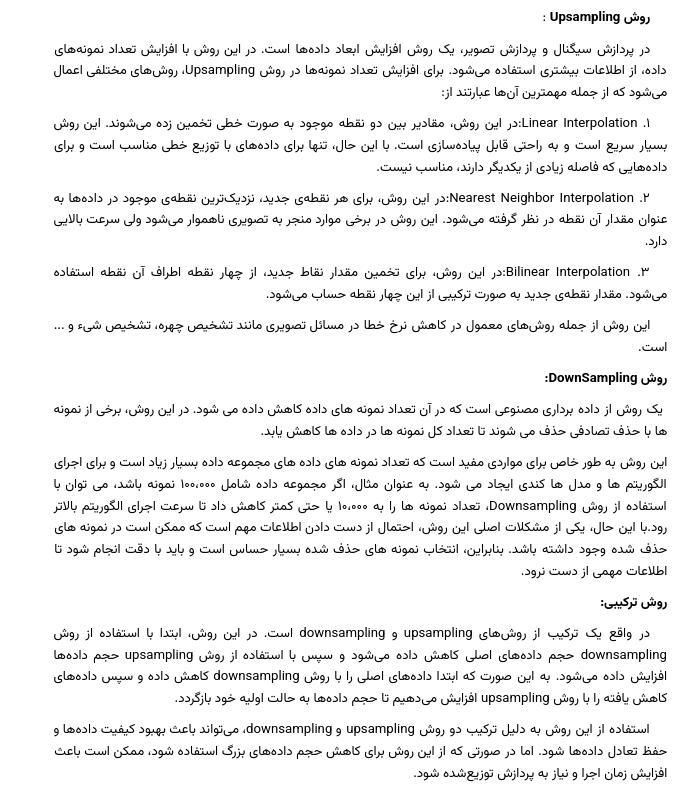

## Q7



## answer 


## Q8
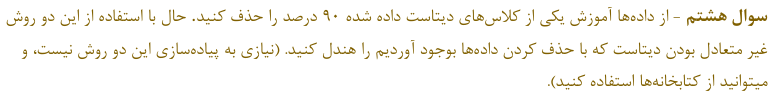

In [8]:
# import new package
from imblearn.combine import SMOTEENN,SMOTETomek
#remove from dataset
new_9=df[df['species']==1]
new=df.drop(new_9.index)


smt = SMOTETomek()

# ایجاد شی SMOTEENN
sme = SMOTEENN()

# تعادل داده ها با روش SMOTETomek
X_res1, y_res1 = smt.fit_resample(new.drop('island', axis=1), new['island'])

# تعادل داده ها با روش SMOTEENN
X_res2, y_res2 = sme.fit_resample(new.drop('island', axis=1), new['island'])
X_res1


bill_length_mm  bill_depth_mm     flipper  body_mass_g  sex  species
0         39.100000      18.700000  181.000000  3750.000000    1        0
1         39.500000      17.400000  186.000000  3800.000000    0        0
2         40.300000      18.000000  195.000000  3250.000000    0        0
3         43.921930      17.151170  200.915205  4201.754386    1        0
4         36.700000      19.300000  193.000000  3450.000000    0        0
..              ...            ...         ...          ...  ...      ...
433       38.930490      18.638976  181.271216  3746.609804    0        0
434       39.990084      18.153451  197.387477  4200.972474    1        0
435       39.171389      18.719836  195.253951  3489.087191    1        0
436       42.141611      19.975358  190.804248  4246.445195    1        0
437       35.384767      16.140197  186.184767  3068.476696    0        0

[438 rows x 6 columns]

In [9]:
y_res1

0      2
1      2
2      2
3      2
4      2
      ..
433    2
434    2
435    2
436    2
437    2
Name: island, Length: 438, dtype: int64

In [10]:
X_res2


bill_length_mm  bill_depth_mm     flipper  body_mass_g  sex  species
0         43.200000      19.000000  197.000000  4775.000000    1        0
1         50.000000      16.300000  230.000000  5700.000000    1        2
2         50.000000      15.200000  218.000000  5700.000000    1        2
3         47.600000      14.500000  215.000000  5400.000000    1        2
4         45.400000      14.600000  211.000000  4800.000000    0        2
..              ...            ...         ...          ...  ...      ...
186       39.736519      17.536932  187.991743  3809.336295    0        0
187       45.110858      18.932203  196.742377  4153.220288    1        0
188       34.108145      18.346808  189.324284  3588.738062    0        0
189       38.600024      21.199879  190.999516  3799.997582    1        0
190       38.899178      20.911507  192.175343  3808.013706    1        0

[191 rows x 6 columns]

In [11]:
y_res2

0      0
1      0
2      0
3      0
4      0
      ..
186    2
187    2
188    2
189    2
190    2
Name: island, Length: 191, dtype: int64

## Q9 
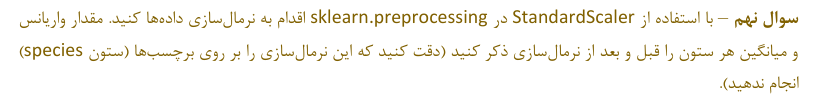

In [12]:
# import lib
from sklearn.preprocessing import StandardScaler
columns=['bill_length_mm', 'bill_depth_mm','flipper','body_mass_g','sex','island']
selected_cols=df[columns]
# mean befor normalize 
print("Mean: ")
print("-"*20)
print(df.mean())
# var before normilize
print("-"*20)
print("var: ")
print("-"*20)
print(df.var())
# normilize 
normal_df=df.copy(deep=True)
scaler = StandardScaler()
normal_df[columns] = scaler.fit_transform(selected_cols)
print("-"*20)
print("Mean: ")
print("-"*20)
print(normal_df.mean())
# var before normilize
print("-"*20)
print("var: ")
print(normal_df.var())
print("-"*20)


Mean: 
--------------------
island               0.662791
bill_length_mm      43.921930
bill_depth_mm       17.151170
flipper            200.915205
body_mass_g       4201.754386
sex                  0.520349
species              0.918605
dtype: float64
--------------------
var: 
--------------------
island                 0.527358
bill_length_mm        29.633252
bill_depth_mm          3.877069
flipper              196.578837
body_mass_g       639381.041890
sex                    0.250314
species                0.798020
dtype: float64
--------------------
Mean: 
--------------------
island            8.262125e-17
bill_length_mm   -1.156697e-15
bill_depth_mm     4.131062e-16
flipper          -8.262125e-16
body_mass_g       8.262125e-17
sex              -6.454785e-18
species           9.186047e-01
dtype: float64
--------------------
var: 
island            1.002915
bill_length_mm    1.002915
bill_depth_mm     1.002915
flipper           1.002915
body_mass_g       1.002915
sex              

## Q10
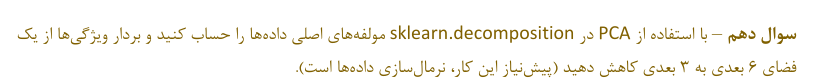

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
new_df=normal_df.copy(deep=True)
new_df.drop('species',axis=1,inplace=True)
pca_new_transform = pca.fit_transform(new_df)
pca_new=pd.DataFrame(pca_new_transform)
pca_new['species']=df['species']
pca_new

0         1         2  species
0   -2.267511  1.266175 -0.048591        0
1   -2.078927 -0.528109  0.842508        0
2   -2.143540 -0.409198  1.103311        0
3   -0.604432  1.186353  0.705630        0
4   -2.594861 -0.183224  0.554844        0
..        ...       ...       ...      ...
339  0.448975  2.107021  1.421763        1
340 -1.012636 -0.547222  0.739321        1
341 -0.379978  1.294431  0.598062        1
342  0.398441  1.669301  0.819717        1
343 -0.536183  0.003741  1.470134        1

[344 rows x 4 columns]

## Q11
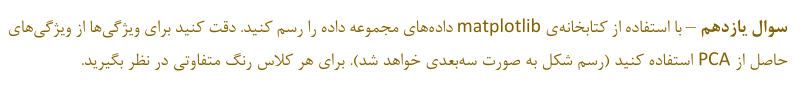


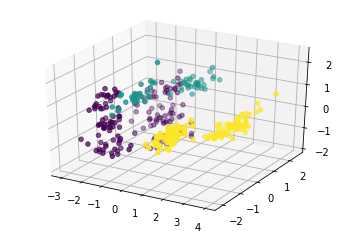

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_new[0], pca_new[1], pca_new[2],c=pca_new['species'] )

plt.show()

## Q12
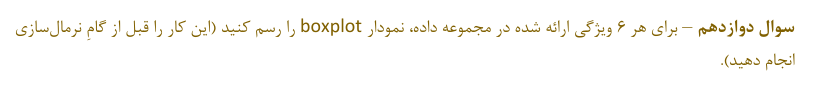

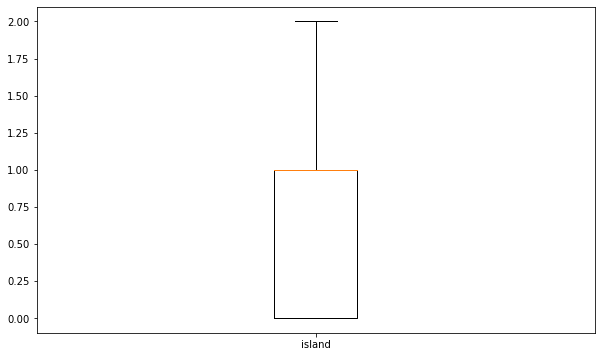

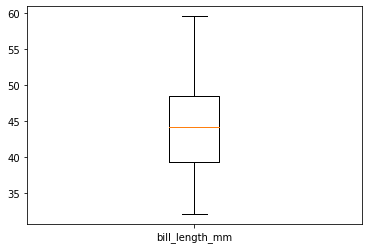

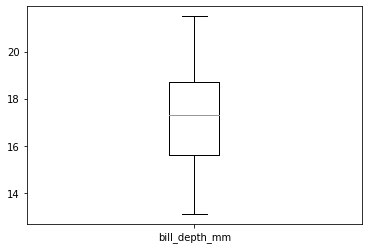

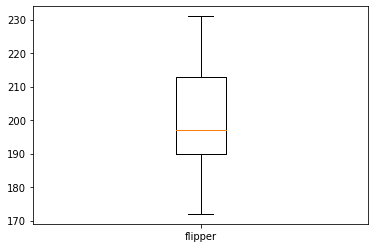

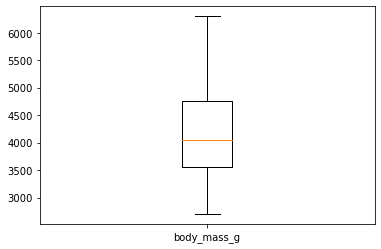

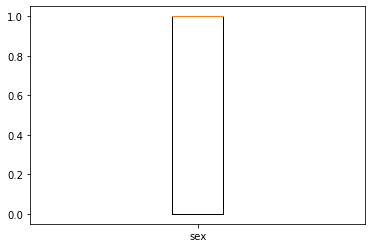

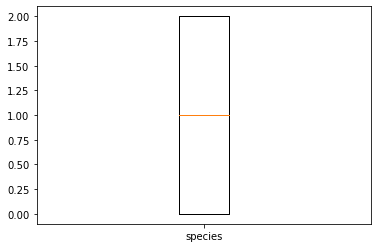

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in df.columns:
    plt.boxplot(df[col], labels=[col])
    plt.show()